### Computational Methods (16:540:540) - Spring 2021
#### Homework 6 – Python Coding

1. Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

2. Assign the output $y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

3. Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn:

        a) Support vector regression

        b) Decision Tree

        c) Artificial Neural Network

Report the MSE and R-squared error. Use 70% of the dataset for training and 30% for testing.

In [43]:
# 1.Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

In [44]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)
p, n=5, 100

In [45]:
# multivariate normal distribution
mu = np.random.uniform(-10,10,size=p)
C = np.random.random((p,p))
cov = C @ C.T # positive semi-definite
x_1 = rng.multivariate_normal(mu, cov, n)

In [46]:
x1_mean = np.mean(x_1)
x1_var = np.var(x_1)

In [47]:
print(f'From univariate normal distribution,the mean of 100 random the samples is {round(x1_mean,4)},the variance is {round(x1_var,4)}')

From univariate normal distribution,the mean of 100 random the samples is -2.6076,the variance is 17.6917


In [48]:
# 2. Assign the output:

$y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

In [49]:
rng = default_rng(5)
y = 5 * x_1[:,0]+ 9*x_1[:,1] + (2 * x_1[:,2])**2 + rng.normal(0,1,n)

In [50]:
# 3.Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=123)

In [72]:
# a) Support vector regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [73]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

In [74]:
print("R2 score in rbf kernel :", r2_score(y_test, y_rbf),"MSE :",mean_squared_error(y_test, y_rbf))
print("R2 score in linear kernel :", r2_score(y_test, y_lin))
print("R2 score in polynomial kernel :", r2_score(y_test, y_poly))

R2 score in rbf kernel : 0.9180376564410213 MSE : 7.410967159105609
R2 score in linear kernel : 0.4444694924592876
R2 score in polynomial kernel : 0.9885419619276072


In [75]:
print("With rbf kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print("With linear kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_lin),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_lin))
print("With polynomial kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_poly),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_poly))

With rbf kernel, Mean squared error: 7.41 ,the Variance score: 0.92(best fit = 1)
With linear kernel, Mean squared error: 50.23 ,the Variance score: 0.44(best fit = 1)
With polynomial kernel, Mean squared error: 1.04 ,the Variance score: 0.99(best fit = 1)


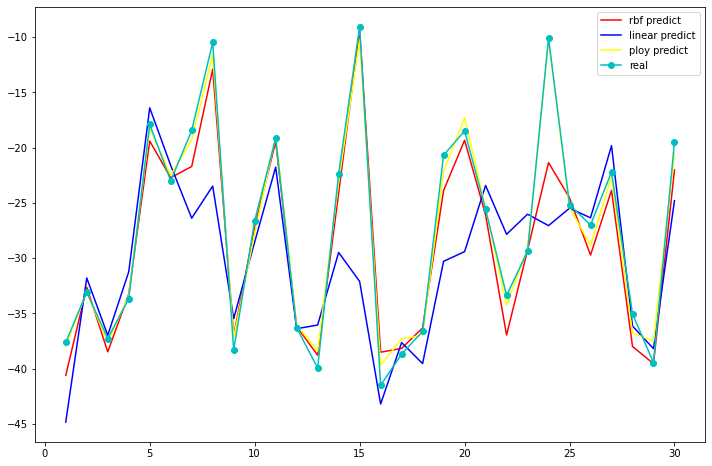

In [93]:
plt.figure(figsize=(12,8))
r = len(x_test) + 1
plt.plot(np.arange(1,r), y_rbf,color='red', label="rbf predict")
plt.plot(np.arange(1,r), y_lin, color='blue',label="linear predict")
plt.plot(np.arange(1,r), y_poly,color='yellow',label="ploy predict")
plt.plot(np.arange(1,r), y_test, 'co-', label="real")
plt.legend()